In [1]:
import ibm_db
import ibm_db_dbi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  BLUDB as user:  rgx31952 on host:  dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net


In [5]:
pconn = ibm_db_dbi.Connection(conn)

<h1>The lapidarist problem</h1>

In [6]:
selectQuery = "select * from DIAMONDS"
df = pd.read_sql(selectQuery, pconn)

Here I imported my data into a pandas DataFrame called df

In [7]:
df.shape

(53930, 10)

the DataFrame has 59,390 rows and 10 columns

In [8]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


<h2>Data Cleaning</h2>

In [9]:
df=df.drop_duplicates()

Here I used drop:duplicates function to remove duplicate rows. There were 146 duplicated rows

In [10]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

I noticed that every columns has a correct data type

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53784 entries, 0 to 53929
Data columns (total 10 columns):
carat      53784 non-null float64
cut        53784 non-null object
color      53784 non-null object
clarity    53784 non-null object
depth      53784 non-null float64
table      53784 non-null float64
price      53784 non-null int64
x          53784 non-null float64
y          53784 non-null float64
z          53784 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


<h2>Feature Selection</h2>

I will use different methods to select the right columns/features in order to get the best trade off between variance and accuracy. loose variance by reducing dimentionality but lose the minimum accuracy

In [12]:
df.describe()

,carat,depth,table,price,x,y,z
count,53784.000000,53784.000000,53784.000000,53784.000000,53784.000000,53784.000000,53784.000000
mean,0.797816,61.747999,57.458253,3933.321043,5.731294,5.734728,3.538756
std,0.473414,1.429998,2.233767,3988.303603,1.120741,1.141259,0.705068
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5327.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.027871,0.181112,0.921547,0.975379,0.951906,0.953540
depth,0.027871,1.000000,-0.297688,-0.011033,-0.025343,-0.029387,0.094764
table,0.181112,-0.297688,1.000000,0.126601,0.194888,0.183262,0.150299
price,0.921547,-0.011033,0.126601,1.000000,0.884500,0.865390,0.861203
x,0.975379,-0.025343,0.194888,0.884500,1.000000,0.974590,0.970684
y,0.951906,-0.029387,0.183262,0.865390,0.974590,1.000000,0.951839
z,0.953540,0.094764,0.150299,0.861203,0.970684,0.951839,1.000000


First, lets have a visual approach on our data

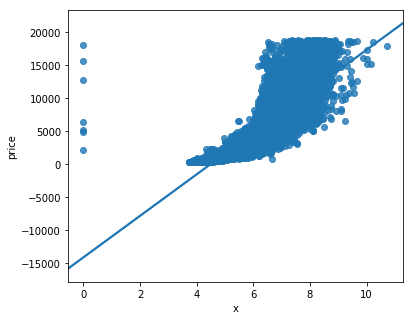

In [14]:
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.regplot(df['x'], df['price'])
plt.show()

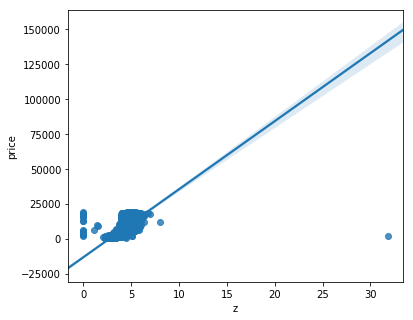

In [15]:
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.regplot(df['z'], df['price'])
plt.show()

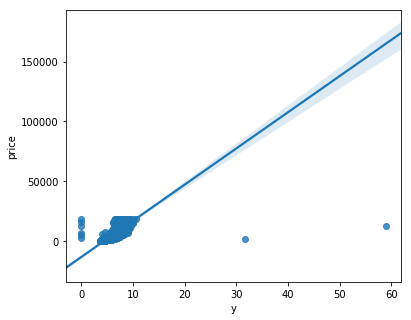

In [16]:
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.regplot(df['y'], df['price'])
plt.show()

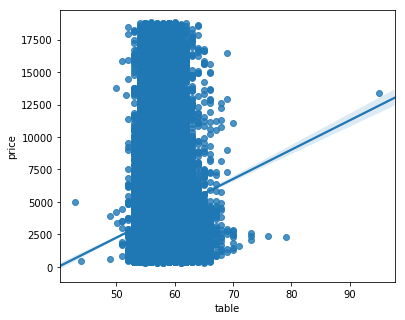

In [17]:
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.regplot(df['table'], df['price'])
plt.show()

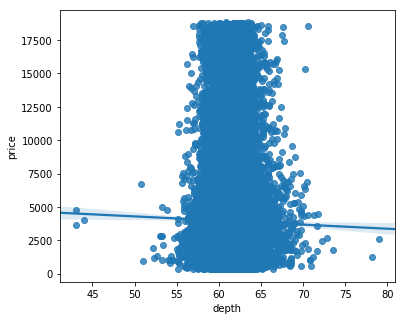

In [18]:
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.regplot(df['depth'], df['price'])
plt.show()

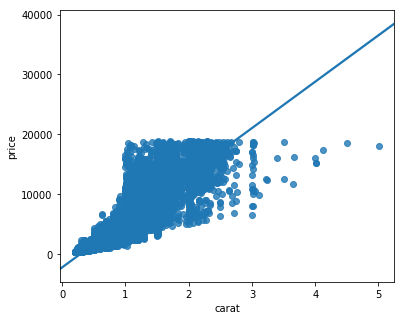

In [19]:
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.regplot(df['carat'], df['price'])
plt.show()

<b>The first method to remove columns will be by cheking each feature's </b>

In [20]:
from sklearn.feature_selection import VarianceThreshold

In [21]:
numeric=df.select_dtypes(include=['float'])

In [22]:
sel=VarianceThreshold(threshold=0.005)
sel.fit(numeric/numeric.mean())
print(df.var())

carat    2.241207e-01
depth    2.044895e+00
table    4.989713e+00
price    1.590657e+07
x        1.256061e+00
y        1.302472e+00
z        4.971208e-01
dtype: float64


In [23]:
mask=sel.get_support()
reduced_df=numeric.loc[:,mask]

In [24]:
reduced_df.head()

,carat,x,y,z
0,0.23,3.95,3.98,2.43
1,0.21,3.89,3.84,2.31
2,0.23,4.05,4.07,2.31
3,0.29,4.20,4.23,2.63
4,0.31,4.34,4.35,2.75


We conclude that we should remove both depth and table columns because of their low variance.
<div><b>The second approach will be to see pairwise correation.</b><div>


In [25]:
corr_df=df.corr().abs()
mask=np.triu(np.ones_like(corr_df,dtype=bool))
tri_df=corr_df.mask(mask)

In [26]:
to_drop=[c for c in tri_df.columns if any (tri_df[c]>0.95)]
reduced_df=df.drop(to_drop, axis=1)

In [27]:
reduced_df.head()

,cut,color,clarity,depth,table,price,z
0,Ideal,E,SI2,61.5,55.0,326,2.43
1,Premium,E,SI1,59.8,61.0,326,2.31
2,Good,E,VS1,56.9,65.0,327,2.31
3,Premium,I,VS2,62.4,58.0,334,2.63
4,Good,J,SI2,63.3,58.0,335,2.75


<b>The third approach is to selec features for model performance using three different models.</b>
<div> We first transform our categorical variables by using pd.get_dummies function</div> 

In [28]:
data=pd.get_dummies(df, columns=["cut","color","clarity"],drop_first=True)
data.head(10)

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
5,0.24,62.8,57.0,336,3.94,3.96,2.48,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,0.24,62.3,57.0,336,3.95,3.98,2.47,0,0,0,...,0,1,0,0,0,0,0,0,1,0
7,0.26,61.9,55.0,337,4.07,4.11,2.53,0,0,0,...,1,0,0,0,1,0,0,0,0,0
8,0.22,65.1,61.0,337,3.87,3.78,2.49,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0.23,59.4,61.0,338,4.00,4.05,2.39,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [29]:
target=data['price']
data.drop('price', axis=1,inplace=True)

We fit and transform our features by scaling them, with mean=0 and standard deviation of 1

In [30]:
X=np.asarray(data)
X[0:1]

array([[ 0.23, 61.5 , 55.  ,  3.95,  3.98,  2.43,  0.  ,  1.  ,  0.  ,
         0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [31]:
y=np.asarray(target)
y[0:5]

array([326, 326, 327, 334, 335])

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc=StandardScaler()

In [34]:
X=sc.fit_transform(X)
X[0:1]

array([[-1.19941857, -0.17342798, -1.10050723, -1.58940385, -1.53755166,
        -1.57256701, -0.3162116 ,  1.22619776, -0.5859098 , -0.53788511,
         2.1218387 , -0.46373025, -0.5145213 , -0.42632647, -0.33424845,
        -0.23439258, -0.18522336, -0.565498  ,  2.20877234, -0.42266602,
        -0.54242271, -0.26970482, -0.32201195]])

In [35]:
from sklearn.model_selection import train_test_split

Then we use train_test_split from sklearn to split our data into train and test sets

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [37]:
from sklearn.linear_model import LassoCV

The first model I used was Lasso regresion to see the coeficients/betas and which ones contribute less to the model

In [38]:
lcv=LassoCV()

In [39]:
lcv.fit(X_train, y_train)
lcv_mask=lcv.coef_ !=0
print(sum(lcv_mask))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


22


In [40]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

The second model is a Random Forest Regressor combined with RFE (Recursive Feature Elimination) from sklearn package. 

In [41]:
rfe_rf=RFE(estimator=RandomForestRegressor(), n_features_to_select=22, step=5, verbose=1)

In [42]:
rfe_rf.fit(X_train, y_train)
rf_mask= rfe_rf.support_

Fitting estimator with 23 features.


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [43]:
from sklearn.ensemble import GradientBoostingRegressor

The last model will be Gradient Boosting. again, I used RFE

In [44]:
rfe_gb=RFE(estimator=GradientBoostingRegressor(), n_features_to_select=22, step=5, verbose=1)

In [45]:
rfe_gb.fit(X_train, y_train)
gb_mask=rfe_gb.support_

Fitting estimator with 23 features.


Finally, we check which features were the most voted(more important) in each model. And only work with the ones with 3 votes

In [257]:
votes=np.sum([lcv_mask, rf_mask, gb_mask], axis=0)
print(votes)

[3 3 3 3 2 3 2 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [47]:
mask= votes>=3
reduced_data = data.loc[:, mask]

In [48]:
reduced_data.head()

,carat,depth,table,x,z,cut_Ideal,cut_Premium,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,2.43,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,2.31,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,2.31,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,2.63,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,2.75,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


<h2>Modeling and evaluation</h2>

Combining the three apporaches, I decided to drop "depth", "table", because of both variance and visual approach, and "y" and "z" columns.
<div><b>  For Modeling, I will use different models. I will evaluate every model using R^2 and RMSE  </b> </div> 
<li><b>Linear Regression<b></li>
<li><b>Lasso Regression (reducing bettas)<b></li>
<li><b>Polinomial Regression<b></li>
<li><b>Xtreme Gradient Boosting Regression<b></li>

In [258]:
df2=df[['carat','cut','color','clarity','x']]
df2=pd.get_dummies(df2, columns=["cut","color","clarity"], drop_first=True)
df2.head(10)

,carat,x,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,3.95,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,3.89,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,4.05,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,4.20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,4.34,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
5,0.24,3.94,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
6,0.24,3.95,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
7,0.26,4.07,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
8,0.22,3.87,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0.23,4.00,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [259]:
X=np.asarray(df2)
X=sc.fit_transform(X)
X[0:1]

array([[-1.19941857, -1.58940385, -0.3162116 ,  1.22619776, -0.5859098 ,
        -0.53788511,  2.1218387 , -0.46373025, -0.5145213 , -0.42632647,
        -0.33424845, -0.23439258, -0.18522336, -0.565498  ,  2.20877234,
        -0.42266602, -0.54242271, -0.26970482, -0.32201195]])

In [260]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

<li><b>Linear Regression<b></li>

In [261]:
lm = LinearRegression()

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

In [263]:
linea=lm.fit(X_train, y_train)

In [264]:
linear_pred=linea.predict(X_test)

In [265]:
rmse_linear = np.sqrt(mean_squared_error(y_test, linear_pred))
rmse_linear

1156.1297626862652

In [266]:
R2_linear= r2_score(y_test, linear_pred)
print('The R-square value is: ', R2_linear)

The R-square value is:  0.9168935826853448


In [267]:
scores_lm= cross_val_score(linea, X, y, cv=4, scoring="neg_mean_squared_error")
scores_lm

array([-1053625.40838829, -4504753.46719951, -1427407.5614946 ,
        -705129.55841209])

In [268]:
rmse_lm_cv=np.mean(np.sqrt(np.abs(scores_lm)))
rmse_lm_cv

1295.8411448333052

In [269]:
lm.coef_

array([ 5319.99154758, -1140.88202627,   197.12079061,   515.31870532,
         409.242126  ,   372.64178872,   -79.85339902,  -104.45184066,
        -196.19904186,  -354.70835865,  -439.91048843,  -529.30137591,
         967.42858948,  1594.43681599,  1035.79375357,  1664.49326993,
        1811.6572277 ,  1276.59972029,  1466.07142153])

<li><b>Lasso Regression<b></li>

In [270]:
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
lasso_pred=lasso.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, lasso_pred))
rmse_lasso

1155.7438470413717

In [271]:
R2_lasso= r2_score(y_test, lasso_pred)
print('The R-square value is: ', R2_lasso)

The R-square value is:  0.9169490552020921


In [272]:
lasso.coef_

array([ 5267.48558152, -1092.96274121,   185.49577109,   496.78554621,
         391.98261851,   357.05705097,   -72.84999597,   -97.95176587,
        -188.48482904,  -347.51594039,  -432.7103256 ,  -523.28773872,
         936.36825035,  1521.81146661,   972.79650099,  1603.02028758,
        1740.76142869,  1233.65100363,  1416.35229074])

In [273]:
scores_lasso= cross_val_score(lasso, X, y, cv=4, scoring="neg_mean_squared_error")
rmse_lasso_cv=np.mean(np.sqrt(np.abs(scores_lasso)))
rmse_lasso_cv

1295.8040922154262

<li><b>Polinomial Regression<b></li>

In [274]:
from sklearn.preprocessing import PolynomialFeatures

In [275]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [276]:
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)

In [277]:
poly = LinearRegression()
poly.fit(X_train_pr, y_train)
pred_poly=poly.predict(X_test_pr)

In [278]:
rmse_poly = np.sqrt(mean_squared_error(y_test, pred_poly))
rmse_poly

730.96839074495

In [279]:
R2_poly= r2_score(y_test, pred_poly)
print('The R-square value is: ', R2_poly)

The R-square value is:  0.9667785494065708


In [280]:
scores_poly= cross_val_score(poly, X, y, cv=4, scoring="neg_mean_squared_error")
scores_poly

array([-1053625.40838829, -4504753.46719951, -1427407.5614946 ,
        -705129.55841209])

In [281]:
rmse_poly_cv=np.mean(np.sqrt(np.abs(scores_poly)))
rmse_poly_cv

1295.8411448333052

<li><b>XGB Regression<b></li>

In [282]:
import xgboost as xgb

In [283]:
xg_reg=xgb.XGBRegressor(objective="reg:linear", n_estimators=15, seed=123, n_jobs=-1, max_depth=4)

In [284]:
xg_reg.fit(X_train, y_train)
pred=xg_reg.predict(X_test)

In [285]:
R2_xgb= r2_score(y_test, pred)
print('The R-square value is: ', R2_xgb)

The R-square value is:  0.8334835941815428


In [286]:
rmse=np.sqrt(mean_squared_error(y_test, pred))
print("RMSE: ", rmse)

RMSE:  1636.5068046039535


In [287]:
scores_xg= cross_val_score(xg_reg, X, y, cv=4, scoring="neg_mean_squared_error")

In [288]:
rmse_xg_cv=np.mean(np.sqrt(np.abs(scores_xg)))
rmse_xg_cv

1777.4368906938073

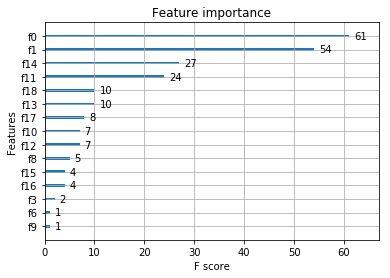

In [289]:
xgb.plot_importance(xg_reg)

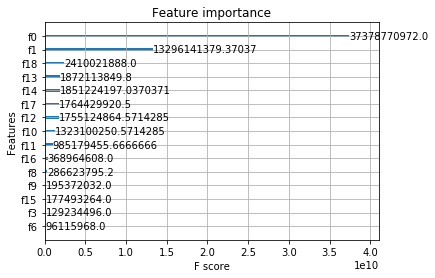

In [290]:
xgb.plot_importance(xg_reg, importance_type='gain')